In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, read csv file
import matplotlib.pyplot as plt # for plot
import seaborn as sns # for plot
import datetime 

In [2]:
data=pd.read_csv("911.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
# Data Cleaning

In [6]:
data.isnull().sum()/len(data)

lat          0.000000
lng          0.000000
desc         0.000000
zip          0.129206
title        0.000000
timeStamp    0.000000
twp          0.000432
addr         0.005216
e            0.000000
dtype: float64

In [7]:
# Columns "zip", "twp", "addr" have lost data

In [8]:
100*data.isnull().sum()/len(data)
# now in percent

lat           0.000000
lng           0.000000
desc          0.000000
zip          12.920637
title         0.000000
timeStamp     0.000000
twp           0.043220
addr          0.521650
e             0.000000
dtype: float64

In [9]:
# lets check every single column

In [10]:
data["title"].head(10)

0         EMS: BACK PAINS/INJURY
1        EMS: DIABETIC EMERGENCY
2            Fire: GAS-ODOR/LEAK
3         EMS: CARDIAC EMERGENCY
4                 EMS: DIZZINESS
5               EMS: HEAD INJURY
6           EMS: NAUSEA/VOMITING
7     EMS: RESPIRATORY EMERGENCY
8          EMS: SYNCOPAL EPISODE
9    Traffic: VEHICLE ACCIDENT -
Name: title, dtype: object

In [11]:
data["title"].iloc[0]

'EMS: BACK PAINS/INJURY'

In [12]:
x=data["title"].iloc[0]

In [13]:
x.split(":")[0]

'EMS'

In [14]:
data["Reason Category"]=data["title"].str.split(':', expand=True)[0]

In [15]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason Category
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [16]:
data['Reason'] = data["title"].str.split(':', expand=True)[1].str.replace(' -', '')

In [17]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason Category,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


In [18]:
data.drop(["title"], axis=1, inplace=True)

In [19]:
100*data.isnull().sum()/len(data)

lat                 0.000000
lng                 0.000000
desc                0.000000
zip                12.920637
timeStamp           0.000000
twp                 0.043220
addr                0.521650
e                   0.000000
Reason Category     0.000000
Reason              0.000000
dtype: float64

In [20]:
data["twp"].unique()

array(['NEW HANOVER', 'HATFIELD TOWNSHIP', 'NORRISTOWN',
       'LOWER POTTSGROVE', 'LANSDALE', 'HORSHAM', 'SKIPPACK',
       'LOWER SALFORD', 'PLYMOUTH', 'MONTGOMERY', 'UPPER MORELAND',
       'CHELTENHAM', 'UPPER MERION', 'WHITEMARSH', 'UPPER GWYNEDD',
       'LOWER PROVIDENCE', 'UPPER DUBLIN', 'WHITPAIN', 'DELAWARE COUNTY',
       'FRANCONIA', 'WEST CONSHOHOCKEN', 'LOWER MERION', 'LIMERICK',
       'TOWAMENCIN', 'DOUGLASS', 'POTTSTOWN', 'BRIDGEPORT', 'AMBLER',
       'CHESTER COUNTY', 'UPPER HANOVER', 'SPRINGFIELD', 'ROCKLEDGE',
       'ABINGTON', 'WEST NORRITON', 'ROYERSFORD', 'UPPER SALFORD',
       'LOWER MORELAND', 'CONSHOHOCKEN', 'PENNSBURG', 'TELFORD',
       'EAST NORRITON', 'UPPER FREDERICK', 'UPPER PROVIDENCE', 'SALFORD',
       'HATFIELD BORO', 'LEHIGH COUNTY', 'LOWER GWYNEDD', 'MARLBOROUGH',
       'BRYN ATHYN', 'HATBORO', 'WORCESTER', 'COLLEGEVILLE',
       'SCHWENKSVILLE', 'PERKIOMEN', 'SOUDERTON', 'UPPER POTTSGROVE',
       'LOWER FREDERICK', nan, 'BUCKS COUNTY', 'RED 

In [21]:
data["twp"].value_counts()

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: twp, Length: 68, dtype: int64

In [22]:
data["twp"].fillna(value=0, inplace=True)

In [23]:
data.groupby("twp").count()

,lat,lng,desc,zip,timeStamp,addr,e,Reason Category,Reason
twp,,,,,,,,,
0,43,43,43,14,43,31,43,43,43
ABINGTON,5977,5977,5977,5675,5977,5959,5977,5977,5977
AMBLER,601,601,601,583,601,594,601,601,601
BERKS COUNTY,284,284,284,172,284,276,284,284,284
BRIDGEPORT,555,555,555,432,555,554,555,555,555
...,...,...,...,...,...,...,...,...,...
WEST NORRITON,1610,1610,1610,1461,1610,1605,1610,1610,1610
WEST POTTSGROVE,514,514,514,466,514,513,514,514,514
WHITEMARSH,2526,2526,2526,2194,2526,2511,2526,2526,2526


In [24]:
# gonna clean nulls
data.drop(data[data.twp == 0].index, inplace=True)

In [25]:
data.groupby("twp").count()

,lat,lng,desc,zip,timeStamp,addr,e,Reason Category,Reason
twp,,,,,,,,,
ABINGTON,5977,5977,5977,5675,5977,5959,5977,5977,5977
AMBLER,601,601,601,583,601,594,601,601,601
BERKS COUNTY,284,284,284,172,284,276,284,284,284
BRIDGEPORT,555,555,555,432,555,554,555,555,555
BRYN ATHYN,173,173,173,161,173,173,173,173,173
...,...,...,...,...,...,...,...,...,...
WEST NORRITON,1610,1610,1610,1461,1610,1605,1610,1610,1610
WEST POTTSGROVE,514,514,514,466,514,513,514,514,514
WHITEMARSH,2526,2526,2526,2194,2526,2511,2526,2526,2526


In [26]:
100*data.isnull().sum()/len(data)

lat                 0.000000
lng                 0.000000
desc                0.000000
zip                12.897063
timeStamp           0.000000
twp                 0.000000
addr                0.509809
e                   0.000000
Reason Category     0.000000
Reason              0.000000
dtype: float64

In [27]:
data["addr"].unique()

array(['REINDEER CT & DEAD END', 'BRIAR PATH & WHITEMARSH LN', 'HAWS AVE',
       ..., 'ARNOLD RD & ST PAULS RD', 'SHEAFF LN & WHITEMARSH VALLEY RD',
       'PARK DR & N ADAMS ST'], dtype=object)

In [28]:
data["addr"].value_counts()

SHANNONDELL DR & SHANNONDELL BLVD                          938
MAIN ST & OLD SUMNEYTOWN PIKE                              390
THE FAIRWAY  & RYDAL RD                                    260
GULPH RD & KIRK AVE                                        235
EVERGREEN RD & W LIGHTCAP RD                               232
                                                          ... 
CHALET RD & MIDDLE CREEK RD                                  1
PENNSYLVANIA TPKE WB & RAMP I276 WB TO PENNSYLVANIA AVE      1
LEWIS RD & RT422 OVERPASS                                    1
DILLON RD & PURDIE LN                                        1
SHANNONDELL BLVD                                             1
Name: addr, Length: 21909, dtype: int64

In [29]:
data.groupby("addr").count()

,lat,lng,desc,zip,timeStamp,twp,e,Reason Category,Reason
addr,,,,,,,,,
.,1,1,1,0,1,1,1,1,1
10TH AVE,6,6,6,6,6,6,6,6,6
10TH AVE & CHESTNUT ST,3,3,3,3,3,3,3,3,3
10TH AVE & FORREST ST,5,5,5,5,5,5,5,5,5
10TH AVE & FREEDLEY ST,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...
ZIEGLERVILLE RD & N GRAVEL PIKE,3,3,3,3,3,3,3,3,3
ZOLLINGER WAY & HEATH RD,1,1,1,1,1,1,1,1,1
ZORRO CT & MILL RD,1,1,1,1,1,1,1,1,1


In [30]:
data.drop(data[data["addr"] == "."].index, inplace=True)

In [31]:
data.groupby("addr").count()

,lat,lng,desc,zip,timeStamp,twp,e,Reason Category,Reason
addr,,,,,,,,,
10TH AVE,6,6,6,6,6,6,6,6,6
10TH AVE & CHESTNUT ST,3,3,3,3,3,3,3,3,3
10TH AVE & FORREST ST,5,5,5,5,5,5,5,5,5
10TH AVE & FREEDLEY ST,7,7,7,7,7,7,7,7,7
10TH AVE & HALLOWELL ST,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
ZIEGLERVILLE RD & N GRAVEL PIKE,3,3,3,3,3,3,3,3,3
ZOLLINGER WAY & HEATH RD,1,1,1,1,1,1,1,1,1
ZORRO CT & MILL RD,1,1,1,1,1,1,1,1,1


In [32]:
100*data.isnull().sum()/len(data)

lat                 0.000000
lng                 0.000000
desc                0.000000
zip                12.896187
timeStamp           0.000000
twp                 0.000000
addr                0.509814
e                   0.000000
Reason Category     0.000000
Reason              0.000000
dtype: float64

In [33]:
data["addr"].fillna(0, inplace=True)

In [34]:
data.groupby("addr").count()

,lat,lng,desc,zip,timeStamp,twp,e,Reason Category,Reason
addr,,,,,,,,,
0,507,507,507,47,507,507,507,507,507
10TH AVE,6,6,6,6,6,6,6,6,6
10TH AVE & CHESTNUT ST,3,3,3,3,3,3,3,3,3
10TH AVE & FORREST ST,5,5,5,5,5,5,5,5,5
10TH AVE & FREEDLEY ST,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...
ZIEGLERVILLE RD & N GRAVEL PIKE,3,3,3,3,3,3,3,3,3
ZOLLINGER WAY & HEATH RD,1,1,1,1,1,1,1,1,1
ZORRO CT & MILL RD,1,1,1,1,1,1,1,1,1


In [35]:
data.drop(data[data["addr"] == 0].index, inplace=True)

In [36]:
data.groupby("addr").count()

,lat,lng,desc,zip,timeStamp,twp,e,Reason Category,Reason
addr,,,,,,,,,
10TH AVE,6,6,6,6,6,6,6,6,6
10TH AVE & CHESTNUT ST,3,3,3,3,3,3,3,3,3
10TH AVE & FORREST ST,5,5,5,5,5,5,5,5,5
10TH AVE & FREEDLEY ST,7,7,7,7,7,7,7,7,7
10TH AVE & HALLOWELL ST,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
ZIEGLERVILLE RD & N GRAVEL PIKE,3,3,3,3,3,3,3,3,3
ZOLLINGER WAY & HEATH RD,1,1,1,1,1,1,1,1,1
ZORRO CT & MILL RD,1,1,1,1,1,1,1,1,1


In [37]:
100*data.isnull().sum()/len(data)

lat                 0.000000
lng                 0.000000
desc                0.000000
zip                12.497347
timeStamp           0.000000
twp                 0.000000
addr                0.000000
e                   0.000000
Reason Category     0.000000
Reason              0.000000
dtype: float64

In [38]:
data["zip"].unique()

array([19525., 19446., 19401.,    nan, 19044., 19426., 19438., 19462.,
       19428., 19040., 19027., 18936., 18974., 19031., 19403., 19422.,
       19085., 18964., 19038., 19406., 19468., 19010., 19095., 19464.,
       19444., 19041., 19440., 19405., 19002., 19096., 19454., 19465.,
       19004., 19066., 19072., 18041., 19046., 19090., 19012., 19025.,
       19473., 18073., 18969., 18074., 19460., 19001., 18054., 19009.,
       19006., 19035., 19150., 19075., 19034., 19151., 19453., 19003.,
       18914., 19512., 18976., 19120., 18915., 18076., 19477., 19087.,
       18966., 19131., 19128., 19083., 19053., 19475., 18960., 19504.,
       18070., 19492., 18932., 19118., 18092., 19490., 19518., 18056.,
       19119., 19107., 19111., 18927., 19435., 18951., 19472., 19503.,
       19126., 19505., 19423., 19138., 36107., 18036., 19116., 19139.,
       19129., 19115., 19355., 77316., 19457., 19082., 19127.])

In [39]:
data["zip"].fillna(value=0, inplace=True)

In [40]:
data.drop(data[data["zip"] == 0].index, inplace=True)

In [41]:
data["zip"].unique()

array([19525., 19446., 19401., 19044., 19426., 19438., 19462., 19428.,
       19040., 19027., 18936., 18974., 19031., 19403., 19422., 19085.,
       18964., 19038., 19406., 19468., 19010., 19095., 19464., 19444.,
       19041., 19440., 19405., 19002., 19096., 19454., 19465., 19004.,
       19066., 19072., 18041., 19046., 19090., 19012., 19025., 19473.,
       18073., 18969., 18074., 19460., 19001., 18054., 19009., 19006.,
       19035., 19150., 19075., 19034., 19151., 19453., 19003., 18914.,
       19512., 18976., 19120., 18915., 18076., 19477., 19087., 18966.,
       19131., 19128., 19083., 19053., 19475., 18960., 19504., 18070.,
       19492., 18932., 19118., 18092., 19490., 19518., 18056., 19119.,
       19107., 19111., 18927., 19435., 18951., 19472., 19503., 19126.,
       19505., 19423., 19138., 36107., 18036., 19116., 19139., 19129.,
       19115., 19355., 77316., 19457., 19082., 19127.])

In [42]:
data["zip"].value_counts()

19401.0    6977
19464.0    6641
19403.0    4854
19446.0    4745
19406.0    3173
           ... 
19139.0       1
77316.0       1
36107.0       1
19457.0       1
19119.0       1
Name: zip, Length: 102, dtype: int64

In [43]:
# converting into int
data["zip"]=data["zip"].astype(int)

In [44]:
data.groupby("zip").count()

,lat,lng,desc,timeStamp,twp,addr,e,Reason Category,Reason
zip,,,,,,,,,
18036,2,2,2,2,2,2,2,2,2
18041,414,414,414,414,414,414,414,414,414
18054,325,325,325,325,325,325,325,325,325
18056,6,6,6,6,6,6,6,6,6
18070,54,54,54,54,54,54,54,54,54
...,...,...,...,...,...,...,...,...,...
19512,220,220,220,220,220,220,220,220,220
19518,57,57,57,57,57,57,57,57,57
19525,961,961,961,961,961,961,961,961,961


In [45]:
100*data.isnull().sum()/len(data)

lat                0.0
lng                0.0
desc               0.0
zip                0.0
timeStamp          0.0
twp                0.0
addr               0.0
e                  0.0
Reason Category    0.0
Reason             0.0
dtype: float64

In [46]:
data.head()

,lat,lng,desc,zip,timeStamp,twp,addr,e,Reason Category,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,HEAD INJURY


In [47]:
data["timeStamp"].iloc[0]

'2015-12-10 17:40:00'

In [48]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [49]:
data["date"] = data["timeStamp"].apply(lambda t: t.date()) 

In [50]:
data.head()

,lat,lng,desc,zip,timeStamp,twp,addr,e,Reason Category,Reason,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,HEAD INJURY,2015-12-10


In [51]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)

In [52]:
data['Day of Week'] = data['timeStamp'].apply(lambda time: time.dayofweek)
data["Day of Week"].iloc[0]
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)

In [53]:
data.head()

,lat,lng,desc,zip,timeStamp,twp,addr,e,Reason Category,Reason,date,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,17,12,Thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,HEAD INJURY,2015-12-10,17,12,Thu


In [54]:
data.drop(["desc", "timeStamp", "e"], axis=1, inplace=True)

In [55]:
data.head()

,lat,lng,zip,twp,addr,Reason Category,Reason,date,Hour,Month,Day of Week
0,40.297876,-75.581294,19525,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,2015-12-10,17,12,Thu
1,40.258061,-75.264680,19446,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,2015-12-10,17,12,Thu
2,40.121182,-75.351975,19401,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,2015-12-10,17,12,Thu
3,40.116153,-75.343513,19401,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,2015-12-10,17,12,Thu
5,40.253473,-75.283245,19446,LANSDALE,CANNON AVE & W 9TH ST,EMS,HEAD INJURY,2015-12-10,17,12,Thu


In [56]:
# Visualisation

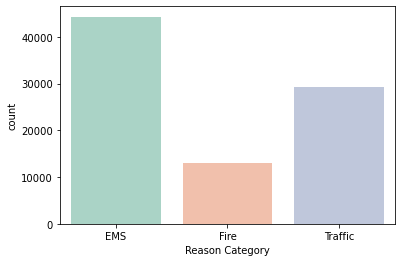

In [57]:
sns.countplot(x='Reason Category', data = data, palette = 'Set2', alpha = 0.6)

In [58]:
# The largest reason category is EMS, followed by Traffic and Fire

In [59]:
byReason=data["Reason"].value_counts().sort_values(ascending=False)[0:10]

In [60]:
byReason=pd.DataFrame(byReason)

In [61]:
byReason=byReason.reset_index()

Text(0, 0.5, 'Number of Cases')

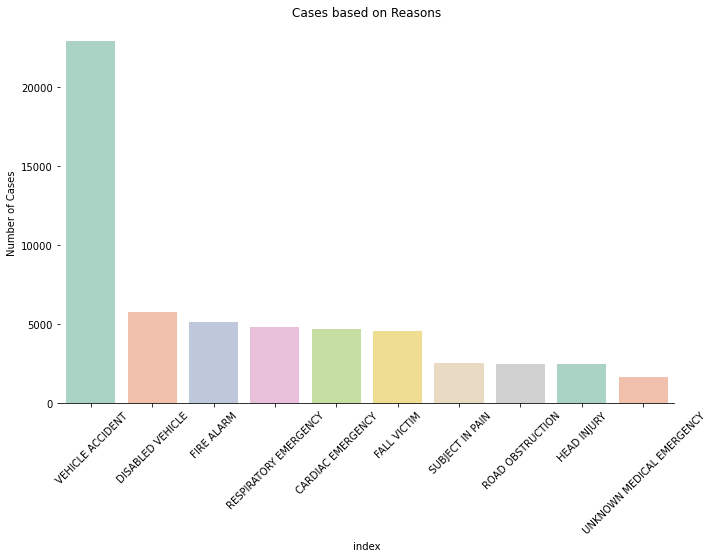

In [63]:
by_Reason=sns.barplot(x='index', y='Reason', data = byReason, palette = 'Set2', alpha = 0.6)
by_Reason.set_xticklabels(by_Reason.get_xticklabels(), rotation=45)
fig=plt.gcf()
fig.set_size_inches(11,7)
sns.despine(left=True)
by_Reason.set_title('Cases based on Reasons')
by_Reason.set_ylabel('Number of Cases')

In [64]:
byReason

,index,Reason
0,VEHICLE ACCIDENT,22941
1,DISABLED VEHICLE,5764
2,FIRE ALARM,5148
3,RESPIRATORY EMERGENCY,4810
4,CARDIAC EMERGENCY,4686
5,FALL VICTIM,4561
6,SUBJECT IN PAIN,2526
7,ROAD OBSTRUCTION,2504
8,HEAD INJURY,2494
9,UNKNOWN MEDICAL EMERGENCY,1682


In [65]:
# Here we see the values for the 10 most common reasons for 911 calls:
# Calls about car accidents are the most frequent and car related calls occupy the first two places in the ranking.
# The fire alarm is the third most common reason for dialing 911.
# Respiratory emergency is in 4th and cardiac emergency is at the 5th place.

In [66]:
byaddr=data["addr"].value_counts().sort_values(ascending=False)[0:10]

In [67]:
byaddr.head(10)

SHANNONDELL DR & SHANNONDELL BLVD    938
MAIN ST & OLD SUMNEYTOWN PIKE        390
THE FAIRWAY  & RYDAL RD              260
GULPH RD & KIRK AVE                  235
EVERGREEN RD & W LIGHTCAP RD         232
BLACK ROCK RD & S TRAPPE RD          219
GERMANTOWN PIKE & HANNAH AVE         210
EAGLEVILLE RD & SUNDERLAND DR        209
DAVISVILLE RD & PENNYPACK RD         203
BETHLEHEM PIKE & NORTH WALES RD      189
Name: addr, dtype: int64

In [68]:
byaddr=pd.DataFrame(byaddr)
byaddr=byaddr.reset_index()

Text(0, 0.5, 'Number of Cases')

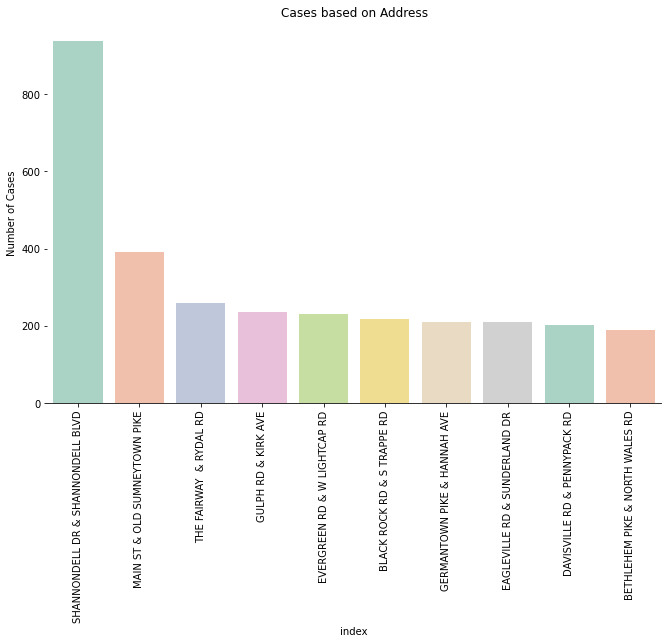

In [69]:
by_address=sns.barplot(x='index', y='addr', data = byaddr, palette = 'Set2', alpha = 0.6)
by_address.set_xticklabels(by_address.get_xticklabels(), rotation=90)
fig=plt.gcf()
fig.set_size_inches(11,7)
sns.despine(left=True)
by_address.set_title('Cases based on Address')
by_address.set_ylabel('Number of Cases')

In [70]:
# SHANNONDELL DR & SHANNONDELL BLVD is the most called address with 938 called times

In [71]:
by_twp=data["twp"].value_counts().sort_values(ascending=False)[0:10]

In [72]:
by_twp=pd.DataFrame(by_twp)
by_twp=by_twp.reset_index()

In [73]:
by_twp.head(10)

,index,twp
0,LOWER MERION,7202
1,ABINGTON,5675
2,NORRISTOWN,5610
3,POTTSTOWN,4029
4,CHELTENHAM,3942
5,UPPER MERION,3582
6,UPPER MORELAND,3123
7,LOWER PROVIDENCE,2970
8,HORSHAM,2764
9,PLYMOUTH,2578


Text(0, 0.5, 'Number of Cases')

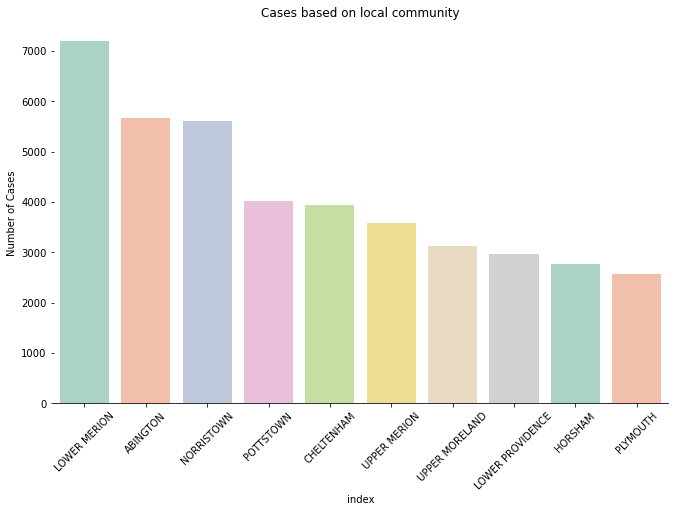

In [74]:
bytwp=sns.barplot(x='index', y='twp', data = by_twp, palette = 'Set2', alpha = 0.6)
bytwp.set_xticklabels(bytwp.get_xticklabels(), rotation=45)
fig=plt.gcf()
fig.set_size_inches(11,7)
sns.despine(left=True)
bytwp.set_title('Cases based on local community')
bytwp.set_ylabel('Number of Cases')

In [75]:
# Top 10 local communities where the call was made from

In [76]:
by_twp.head(10)

,index,twp
0,LOWER MERION,7202
1,ABINGTON,5675
2,NORRISTOWN,5610
3,POTTSTOWN,4029
4,CHELTENHAM,3942
5,UPPER MERION,3582
6,UPPER MORELAND,3123
7,LOWER PROVIDENCE,2970
8,HORSHAM,2764
9,PLYMOUTH,2578


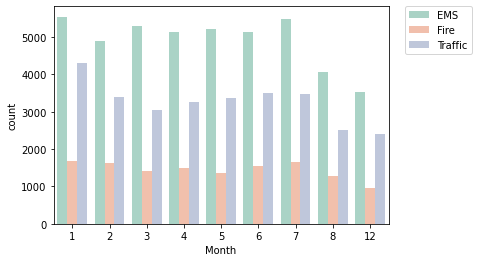

In [77]:
sns.countplot(x='Month', hue="Reason Category", data = data, palette = 'Set2', alpha = 0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [78]:
# Unfortunately we dont have any data to months september, october and november (months 9-11).
# Traffic is the most common calling group in January, most likely because snow and ice leads to more accidents and the cold weather prevents cars from starting.
# The numbers for the traffic group also go up during the summer months, very likely because more people use vehicles in the warm months.
# Fire is the most common reason to call 911 during the winter months and in June and July. We can assume that heating has some influence and also christmas tree fires.

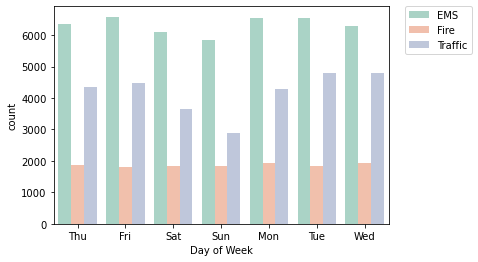

In [79]:
sns.countplot(x='Day of Week', hue="Reason Category", data = data, palette = 'Set2', alpha = 0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [80]:
data["Reason Category"].value_counts()

EMS        44318
Traffic    29254
Fire       13004
Name: Reason Category, dtype: int64

In [81]:
# The calls to the basic EMS are stable the whole week. Basic traffic on the weekend is weaker. The reason "Fire" is also stable throughout the week.

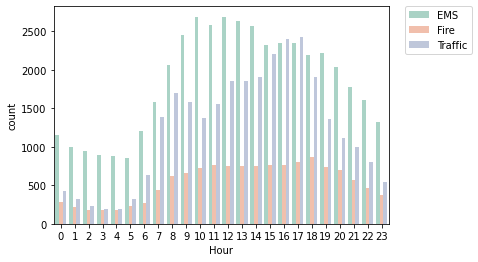

In [82]:
sns.countplot(x='Hour', hue="Reason Category", data = data, palette = 'Set2', alpha = 0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [83]:
# Reason EMS: most calls go to 911 from 8 a.m. and all day long.
# Reason fire: the peak of the calls is at 6 p.m., but from 8 a.m. to 11 p.m., fewer fires are reported during the night.
# Traffic problems are most common between 5 and 6 pm. Probably many are on their way home from work.
# Just like the number of traffic problems increases when driving to work tomorrow morning between 7-9 o'clock.

In [84]:
day_by_week=data.groupby("Day of Week").count()["twp"]

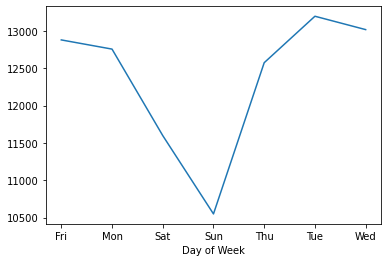

In [85]:
day_by_week.plot()

In [86]:
day_by_week

Day of Week
Fri    12880
Mon    12757
Sat    11599
Sun    10550
Thu    12575
Tue    13197
Wed    13018
Name: twp, dtype: int64

In [87]:
# Sunday is the day on which the fewest calls arrive. Thursday, on the other hand, most of all.

In [88]:
by_date=data.groupby("date").count()["twp"]

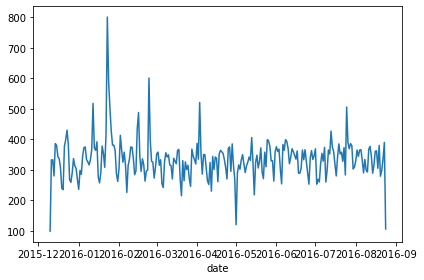

In [100]:
by_date.plot()
plt.tight_layout()

In [90]:
# We see that in February 2016 the calls from the comunities have increased significantly.
# In May, September and December the count of calls decreased

Text(0.5, 1.0, 'Traffic')

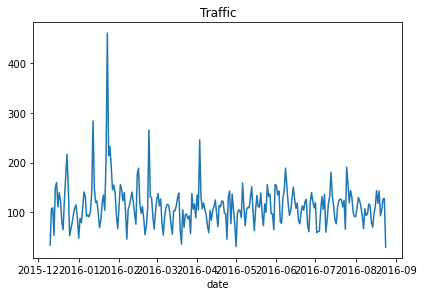

In [91]:
data[data["Reason Category"]=="Traffic"].groupby("date").count()["twp"].plot()
plt.tight_layout()
plt.title("Traffic")

In [92]:
# In February, the reason for the call "Traffic" reaches the highest number. 
# Overall, it is the most frequent reason for the call during the cold season.

Text(0.5, 1.0, 'Fire')

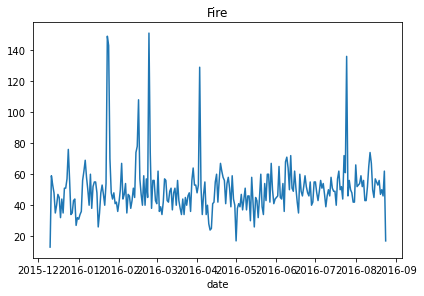

In [93]:
data[data["Reason Category"]=="Fire"].groupby("date").count()["twp"].plot()
plt.tight_layout()
plt.title("Fire")

In [94]:
# In winter to spring the reason "fire" is very common. The number of calls also skyrocketed in August

Text(0.5, 1.0, 'EMS')

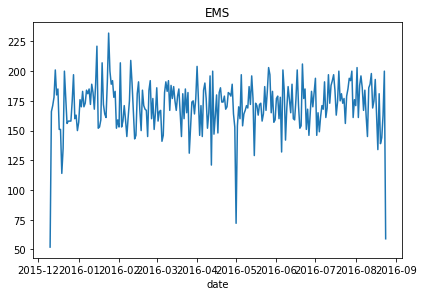

In [95]:
data[data["Reason Category"]=="EMS"].groupby("date").count()["twp"].plot()
plt.tight_layout()
plt.title("EMS")

In [96]:
# This reason for calling is the most common in the winter months

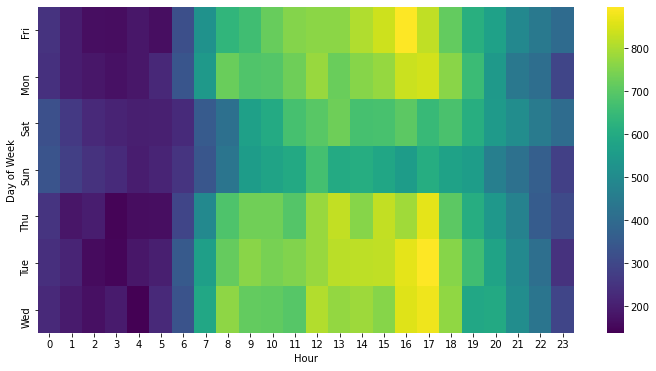

In [97]:
dayHour = data.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [98]:
# Here we can see what time most calls come in. yellow is the color for most calls.
# We can see, that the most calls are made in the time between 4 and 5 pm, after a hard working day. Together with the high number of traffic related
# calls we can assume, that decreasing concentration is leading to a higher number of car accidents.